This notebook visualizes the barycenter between Gaussian distributions with MMD-regularized UOT.
- RBF kernel is used for MMD.
- Results are shown for two cases: when we solve with a simplex constraint (balanced case) and when we solve with a non-negativity constraint (unbalanced case).

In [1]:
import ot
import torch
from ot_mmd.utils import get_cost_G
from ot_mmd.barycenter import solve_apgd
import matplotlib.pyplot as plt

n = 100
device = torch.device("cuda" if torch.cuda.is_available else "cpu")
dtype = torch.float64

x = torch.arange(n, device=device, dtype=dtype)

a1 = torch.from_numpy(ot.datasets.make_1D_gauss(n, m=20, s=5)).to(dtype).to(device)
a2 = torch.from_numpy(ot.datasets.make_1D_gauss(n, m=60, s=8)).to(dtype).to(device)

#### Coefficients 0.5, 0.5

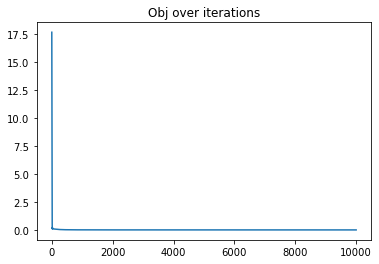

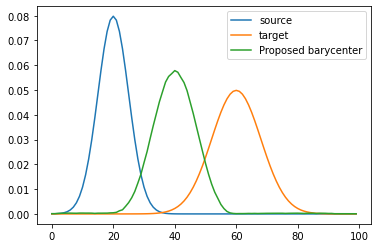

In [9]:
"""Solving the unbalanced case"""
rho={1: 0.5, 2: 0.5}
ktype = "rbf"
khp = 0.1
lda1 = 500
lda2 = lda1
max_itr = 10000

C1, G = get_cost_G(x=x, y=x, khp=khp, ktype=ktype, p=2)
lda = {1: lda1, 2: lda2}

bary, obj_itr = solve_apgd({1: C1, 2: C1}, {1: G[1], 2: G[2], 'all': G[1]}, {1: a1, 2: a2}, max_itr, lda,\
                           rho, case="unb")

plt.clf()
plt.plot([val.item() for val in obj_itr])
plt.title("Obj over iterations")
plt.show()

plt.clf()
plt.plot(a1.cpu().numpy(), label='source')
plt.plot(a2.cpu().numpy(), label='target')
plt.plot(bary.cpu().numpy(), label='Proposed barycenter')
plt.legend()
plt.show()

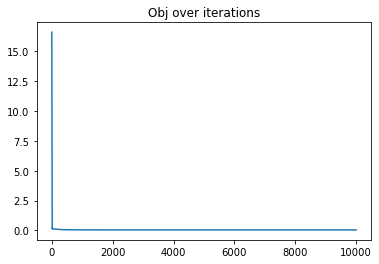

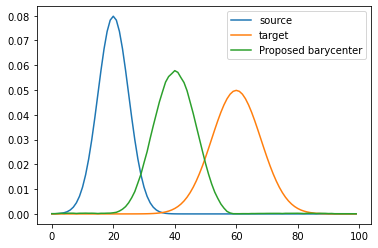

In [10]:
"""Solving the balanced case"""
rho={1: 0.5, 2: 0.5}
ktype = "rbf"
khp = 0.1
lda1 = 500
lda2 = lda1
max_itr = 10000

C1, G = get_cost_G(x=x, y=x, khp=khp, ktype=ktype, p=2)
lda = {1: lda1, 2: lda2}

bary, obj_itr = solve_apgd({1: C1, 2: C1}, {1: G[1], 2: G[2], 'all': G[1]}, {1: a1, 2: a2}, max_itr, lda,\
                           rho, case="bal")

plt.clf()
plt.plot([val.item() for val in obj_itr])
plt.title("Obj over iterations")
plt.show()

plt.clf()
plt.plot(a1.cpu().numpy(), label='source')
plt.plot(a2.cpu().numpy(), label='target')
plt.plot(bary.cpu().numpy(), label='Proposed barycenter')
plt.legend()
plt.show()

#### Coefficients 0, 1

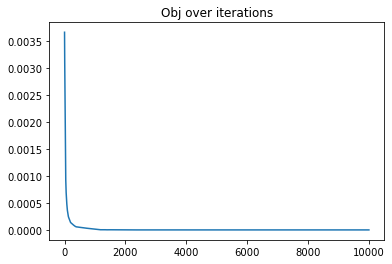

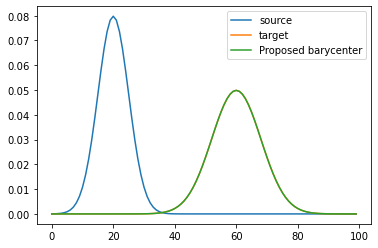

In [4]:
"""Solving the unbalanced case"""
rho={1: 0, 2: 1}
ktype = "rbf"
khp = 0.05
lda1 = 0.1
lda2 = lda1
max_itr = 10000

C1, G = get_cost_G(x=x, y=x, khp=khp, ktype=ktype, p=2)
lda = {1: lda1, 2: lda2}

bary, obj_itr = solve_apgd({1: C1, 2: C1}, {1: G[1], 2: G[2], 'all': G[1]}, {1: a1, 2: a2}, max_itr, lda,\
                           rho, case="unb")

plt.clf()
plt.plot([val.item() for val in obj_itr])
plt.title("Obj over iterations")
plt.show()

plt.clf()
plt.plot(a1.cpu().numpy(), label='source')
plt.plot(a2.cpu().numpy(), label='target')
plt.plot(bary.cpu().numpy(), label='Proposed barycenter')
plt.legend()
plt.show()

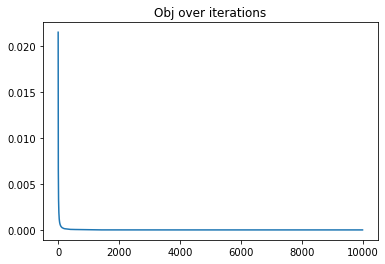

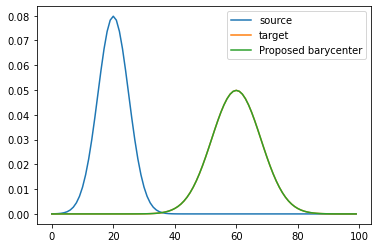

In [5]:
"""Solving the balanced case"""
rho={1: 0, 2: 1}
ktype = "rbf"
khp = 0.05
lda1 = 0.1
lda2 = lda1
max_itr = 10000

C1, G = get_cost_G(x=x, y=x, khp=khp, ktype=ktype, p=2)
lda = {1: lda1, 2: lda2}

bary, obj_itr = solve_apgd({1: C1, 2: C1}, {1: G[1], 2: G[2], 'all': G[1]}, {1: a1, 2: a2}, max_itr, lda,\
                           rho, case="bal")

plt.clf()
plt.plot([val.item() for val in obj_itr])
plt.title("Obj over iterations")
plt.show()

plt.clf()
plt.plot(a1.cpu().numpy(), label='source')
plt.plot(a2.cpu().numpy(), label='target')
plt.plot(bary.cpu().numpy(), label='Proposed barycenter')
plt.legend()
plt.show()

#### Coefficients 1, 0

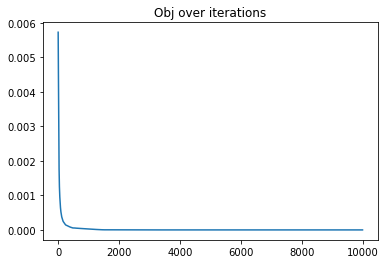

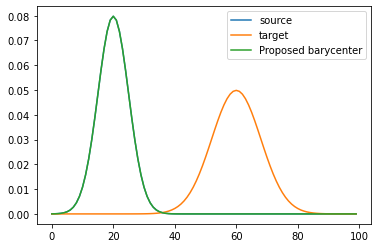

In [6]:
"""Solving the unbalanced case"""
rho={1: 1, 2: 0}
ktype = "rbf"
khp = 0.05
lda1 = 0.1
lda2 = lda1
max_itr = 10000

C1, G = get_cost_G(x=x, y=x, khp=khp, ktype=ktype, p=2)
lda = {1: lda1, 2: lda2}

bary, obj_itr = solve_apgd({1: C1, 2: C1}, {1: G[1], 2: G[2], 'all': G[1]}, {1: a1, 2: a2}, max_itr, lda,\
                           rho, case="unb")

plt.clf()
plt.plot([val.item() for val in obj_itr])
plt.title("Obj over iterations")
plt.show()

plt.clf()
plt.plot(a1.cpu().numpy(), label='source')
plt.plot(a2.cpu().numpy(), label='target')
plt.plot(bary.cpu().numpy(), label='Proposed barycenter')
plt.legend()
plt.show()

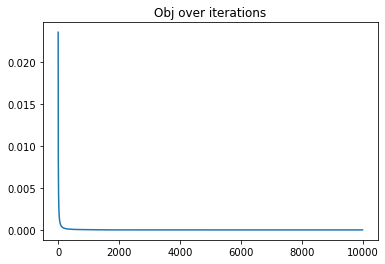

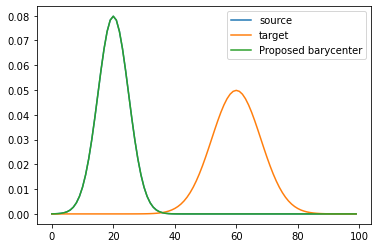

In [7]:
"""Solving the balanced case"""
rho={1: 1, 2: 0}
ktype = "rbf"
khp = 0.05
lda1 = 0.1
lda2 = lda1
max_itr = 10000

C1, G = get_cost_G(x=x, y=x, khp=khp, ktype=ktype, p=2)
lda = {1: lda1, 2: lda2}

bary, obj_itr = solve_apgd({1: C1, 2: C1}, {1: G[1], 2: G[2], 'all': G[1]}, {1: a1, 2: a2}, max_itr, lda,\
                           rho, case="bal")

plt.clf()
plt.plot([val.item() for val in obj_itr])
plt.title("Obj over iterations")
plt.show()

plt.clf()
plt.plot(a1.cpu().numpy(), label='source')
plt.plot(a2.cpu().numpy(), label='target')
plt.plot(bary.cpu().numpy(), label='Proposed barycenter')
plt.legend()
plt.show()